In [2]:
import yfinance as yf
# create ticker for Apple Stock
ticker = yf.Ticker('AAPL')
# get data of the most recent date
todays_data = ticker.history(period='1d')

print(todays_data)

                                 Open        High    Low       Close  \
Date                                                                   
2024-04-15 00:00:00-04:00  175.360001  176.630005  172.5  172.690002   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-04-15 00:00:00-04:00  73096917        0.0           0.0  


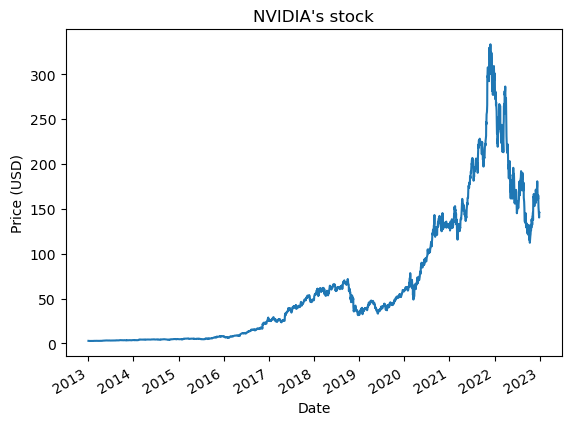

In [10]:
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

# startDate and endDate
startDate = datetime.datetime(2013, 1, 1)
endDate = datetime.datetime(2023, 1, 1)

# Retrieving historical data for NVDA
nvda_data = yf.Ticker('NVDA')
nvda_df = nvda_data.history(start=startDate, end=endDate)

# Plotting the close price
nvda_df['Close'].plot(title="NVIDIA's stock")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


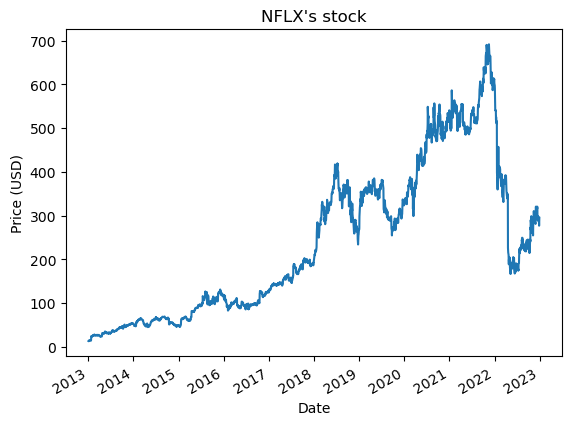

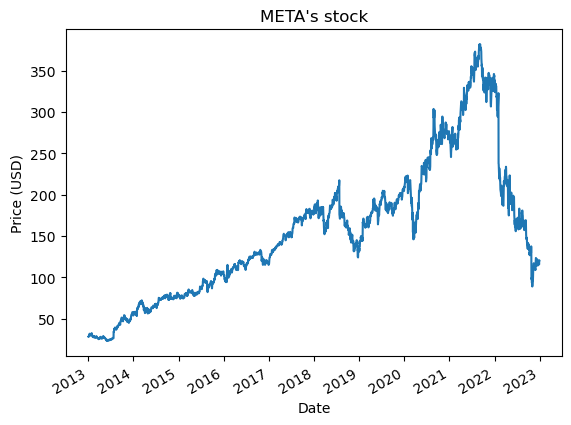

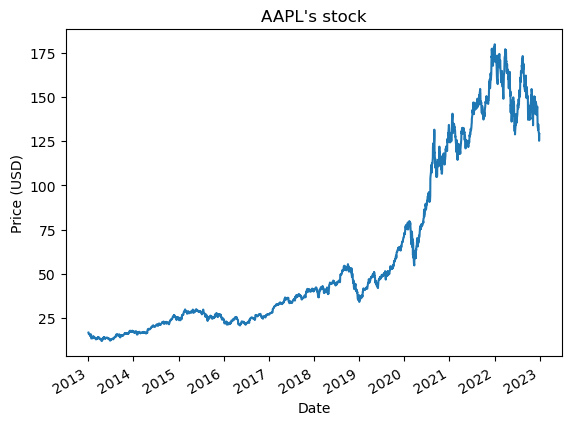

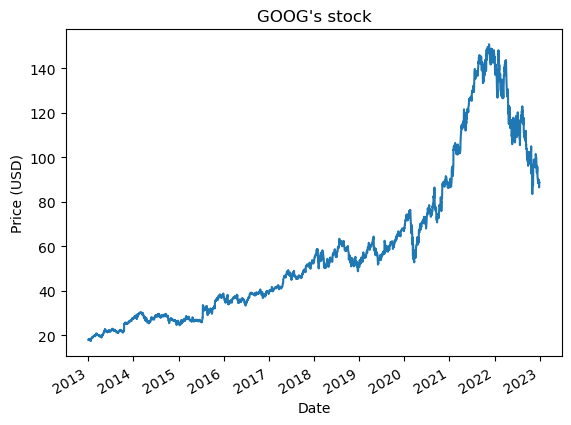

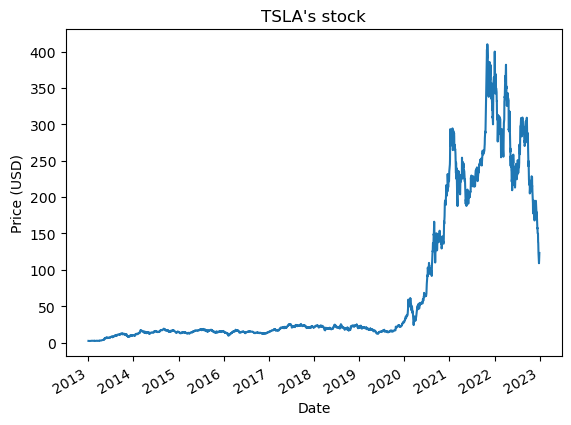

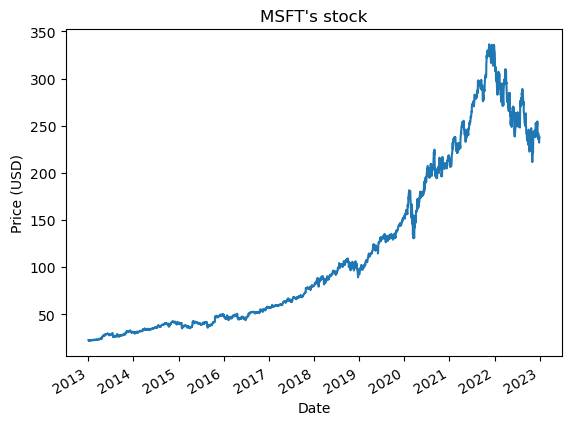

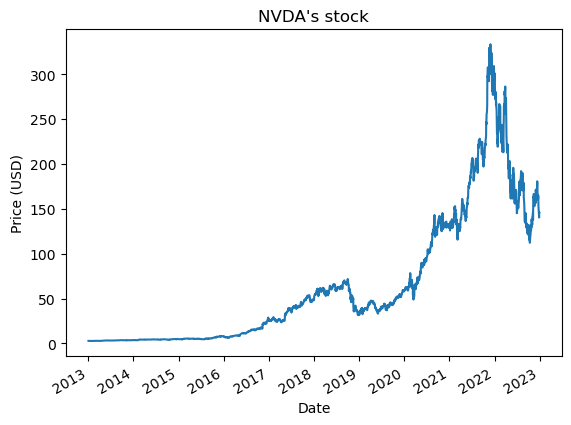

In [12]:
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

# Start and end dates
startDate = datetime.datetime(2013, 1, 1)
endDate = datetime.datetime(2023, 1, 1)

# List of stock symbols
symbols = ['NFLX', 'META', 'AAPL', 'GOOG', 'TSLA', 'MSFT', 'NVDA']

# Retrieve and plot historical data for each stock
for symbol in symbols:
    # Retrieving historical data
    stock_data = yf.Ticker(symbol)
    stock_df = stock_data.history(start=startDate, end=endDate)
    
    # Plotting the close price
    stock_df['Close'].plot(title=f"{symbol}'s stock")
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.show()


[*********************100%%**********************]  7 of 7 completed


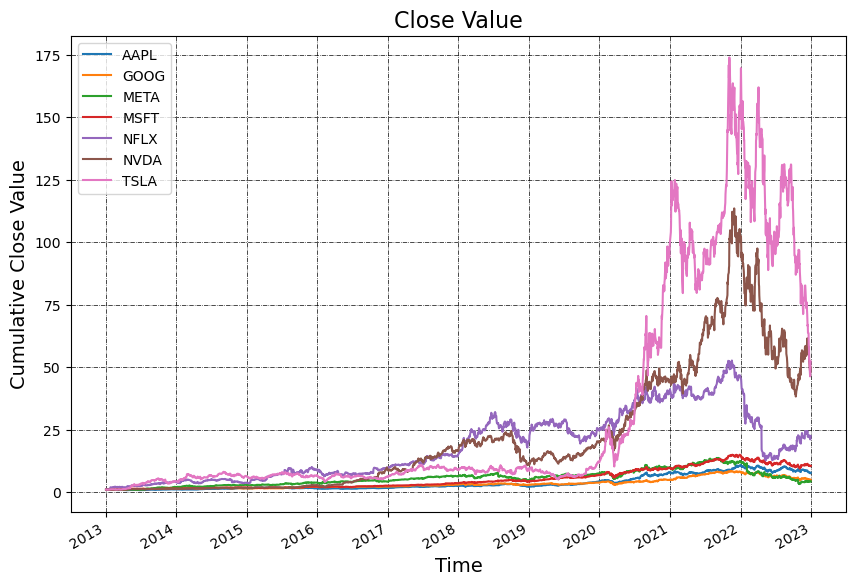

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

tickers_list = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'NFLX', 'GOOG', 'META']

data = yf.download(tickers_list, start='2013-01-01', end='2023-01-01')['Adj Close']

((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
plt.legend()
plt.title("Close Value", fontsize=16)
plt.ylabel('Cumulative Close Value', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


[*********************100%%**********************]  7 of 7 completed


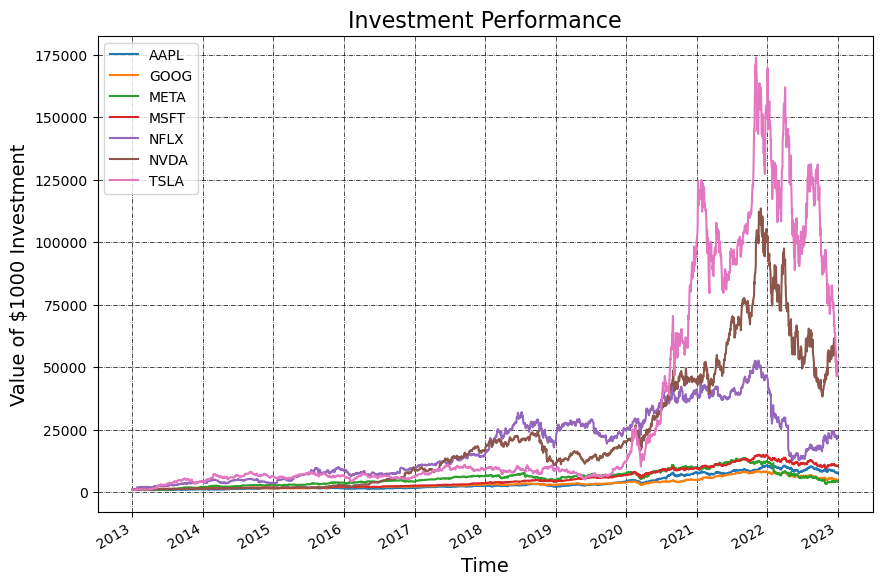

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

tickers_list = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'NFLX', 'GOOG', 'META']

data = yf.download(tickers_list, start='2013-01-01', end='2023-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change()

# Calculate cumulative returns based on $1000 investment
cumulative_returns = (returns + 1).cumprod()

# Calculate the value of the $1000 investment over time
investment_value = 1000 * cumulative_returns

# Plot investment performance
investment_value.plot(figsize=(10, 7))
plt.legend()
plt.title("Investment Performance", fontsize=16)
plt.ylabel('Value of $1000 Investment', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import ipywidgets as widgets
from IPython.display import display

tickers_list = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'NFLX', 'GOOG', 'META']

data = yf.download(tickers_list, start='2013-01-01', end='2023-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change()

# Calculate cumulative returns based on $1000 investment
cumulative_returns = (returns + 1).cumprod()

# Calculate the value of the $1000 investment over time
investment_value = 1000 * cumulative_returns

# Dropdown menu for selecting a stock
dropdown = widgets.Dropdown(options=tickers_list, description='Select Stock:')

def plot_stock_performance(stock):
    plt.figure(figsize=(10, 7))
    plt.plot(investment_value.index, investment_value[stock], label=stock)
    plt.legend()
    plt.title("Investment Performance of {}".format(stock), fontsize=16)
    plt.ylabel('Value of $1000 Investment', fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    plt.show()

widgets.interactive(plot_stock_performance, stock=dropdown)


[*********************100%%**********************]  7 of 7 completed


interactive(children=(Dropdown(description='Select Stock:', options=('AAPL', 'MSFT', 'NVDA', 'TSLA', 'NFLX', '…

In [3]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import yfinance as yf

# Fetch data
tickers_list = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'NFLX', 'GOOG', 'META']
data = yf.download(tickers_list, start='2013-01-01', end='2023-01-01')['Adj Close']
returns = data.pct_change()
cumulative_returns = (returns + 1).cumprod()
investment_value = 1000 * cumulative_returns

# Initialize Dash app
app = dash.Dash(__name__)

# Dropdown menu for selecting a stock
dropdown = dcc.Dropdown(
    id='stock-dropdown',
    options=[{'label': stock, 'value': stock} for stock in tickers_list],
    value=tickers_list[0]
)

# Define layout
app.layout = html.Div([
    html.H1("Stock Investment Performance"),
    html.Div([
        html.Label("Select Stock:"),
        dropdown
    ]),
    dcc.Graph(id='investment-chart')
])

# Define callback to update chart based on dropdown selection
@app.callback(
    Output('investment-chart', 'figure'),
    [Input('stock-dropdown', 'value')]
)
def update_chart(selected_stock):
    fig = {
        'data': [{
            'x': investment_value.index,
            'y': investment_value[selected_stock],
            'type': 'line',
            'name': selected_stock
        }],
        'layout': {
            'title': f'Investment Performance of {selected_stock}',
            'xaxis': {'title': 'Time'},
            'yaxis': {'title': 'Value of $1000 Investment'}
        }
    }
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


[*********************100%%**********************]  7 of 7 completed


In [6]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import yfinance as yf

# Fetch data
tickers_list = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'NFLX', 'GOOG', 'META']
data = yf.download(tickers_list, start='2013-01-01', end='2023-01-01')['Adj Close']
returns = data.pct_change()
cumulative_returns = (returns + 1).cumprod()
investment_value = 1000 * cumulative_returns

# Initialize Dash app
app = dash.Dash(__name__)

# Dropdown menu for selecting multiple stocks
dropdown = dcc.Dropdown(
    id='stock-dropdown',
    options=[{'label': stock, 'value': stock} for stock in tickers_list],
    value=tickers_list,
    multi=True  # Allow multiple selections
)

# Define layout
app.layout = html.Div([
    html.H1("Stock Investment Performance"),
    html.Div([
        html.Label("Select Stock(s):"),
        dropdown
    ]),
    dcc.Graph(id='investment-chart')
])

# Define callback to update chart based on dropdown selection
@app.callback(
    Output('investment-chart', 'figure'),
    [Input('stock-dropdown', 'value')]
)
def update_chart(selected_stocks):
    if not selected_stocks:
        return {'data': [], 'layout': {}}
    
    data_to_plot = []
    for stock in selected_stocks:
        trace = {
            'x': investment_value.index,
            'y': investment_value[stock],
            'type': 'line',
            'name': stock
        }
        data_to_plot.append(trace)

    fig = {
        'data': data_to_plot,
        'layout': {
            'title': 'Investment Performance',
            'xaxis': {'title': 'Time'},
            'yaxis': {'title': 'Value of $1000 Investment'}
        }
    }
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


[*********************100%%**********************]  7 of 7 completed
